In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics

df_raw = pd.read_csv("data.csv", sep=";")

df = df_raw.melt(id_vars=["H03", "H05", "H16"],
                 var_name="Date", value_name="sales")

df[["Prefix", "Month", "Year"]] = df["Date"].astype(
    "str").str.extract(r'(MO)(\d{2})(\d{4})')

df["date"] = pd.to_datetime(df["Year"].astype(
    str)+"-"+df["Month"].astype(str)+"-"+"01", format="%Y-%m-%d")

df.drop(columns=["Date", "Prefix", "Month", "Year"], inplace=True)
print(df.head())

# Convert categorical variable into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=['date', 'H03', 'H05', 'H16'])

# Splitting the data into features and target variable
X = df_encoded.drop('sales', axis=1)
y = df_encoded['sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Creating the linear regression model and fitting the data
model = Ridge(alpha=1.0)

# Creating the linear regression model and fitting the data
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

r2_score = metrics.r2_score(y_test, y_pred)
print("R2 Score:", r2_score)

# Writing the result to a file
with open('results.txt', 'w') as f:
    f.write(f"R2 Score: {r2_score}\n")

        H03                   H05             H16  sales       date
0  FMP20000  Total, gold included  Actual indices  102.9 1980-01-01
1  FMP20001  Total, gold excluded  Actual indices   55.1 1980-01-01
2  FMP21000                  Coal  Actual indices   44.7 1980-01-01
3  FMP23010              Iron ore  Actual indices   37.8 1980-01-01
4  FMP23020              Chromium  Actual indices   24.7 1980-01-01
R2 Score: 0.9235457721649941


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

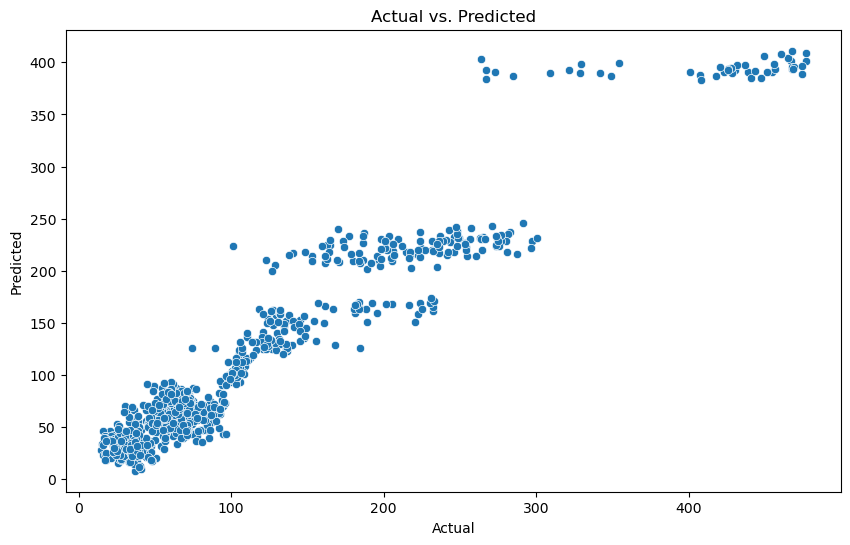

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.savefig('actual_vs_predicted.png')